Los modelos de clasificación son capaces de predecir cuál es la etiqueta correspondiente a cada ejemplo o instancia basado en aquello que ha aprendido del conjunto de datos de entrenamiento. Estos modelos necesitan ser evaluados de alguna manera y posteriormente comparar los resultados obtenidos con aquellos que fueron entrenados.

Una manera de hacerlo es mediante la matriz de confusión la cual nos permite evaluar el desempeño de un algoritmo de clasificación a partir del conteo de los aciertos y errores en cada una de las clases del algoritmo.

Como su nombre lo dice tenemos una matriz que nos ayuda a evaluar la predicción mediante positivos y negativos como se muestra en la figura.

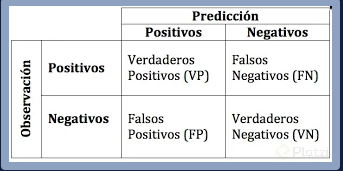



In [12]:
#Regresion logistica
#Clasifica

import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics #Nos permite evaluar nuestro modelo
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import seaborn as sns #Nos permite mejorar la presentación de los gráficos
#La siguiente linea nos permite insetar gráficos en el notebook
%matplotlib inline 

In [4]:
dataset = pd.read_csv('./diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [8]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] 
x= dataset[feature_cols]
y= dataset.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test) 

In [15]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

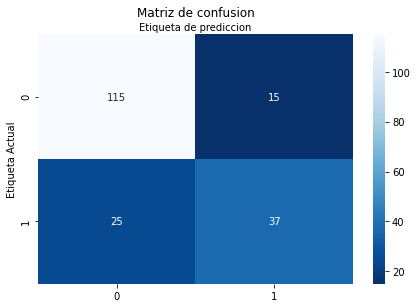

In [22]:
import numpy as np

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [23]:
metrics.accuracy_score(Y_test,y_pred)

0.7916666666666666